##gender_age_train  named as cust
columns
#device_id 	gender 	age 	group
No of records #74645  

#phone_brand_device_model named as brand
#device_id 	phone_brand 	device_model
#87726 entries

#event_id 	device_id 	timestamp 	longitude 	latitude 	city 	state 


After merging all 3 datasets
missing values as follows
event_id          0
device_id       453
timestamp         0
longitude       423
latitude        423
city              0
state           377
gender          453
age             453
group           453
phone_brand     453
device_model    453


#1002178 entries
#TamilNadu, Manipur, Chandigarh, Tripura, UttarPradesh, ArunachalPradesh 

Index: 164924 entries
    
#1000 unique device ids
#1000 unique events

##city has 0 missing
##state has some missing fill state from city
##lat long should be filled with mode of city of lat long
#device id to be filled with nearest neighbors as of lat long
#age gender agegroup can be filled with mode

In [1]:
#pip install mysql-connector-python
import pandas as pd
import numpy as np
import mysql.connector
#from mysql.connector import Error

pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [3]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

In [4]:
connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone1',
                                         user='student',
                                         password='student')
sql_select_Query = "select * from information_schema.columns where table_name = 'gender_age_train'"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Total number of rows in gender_age_train is: ", cursor.rowcount)
print("\nPrinting column Names of table gender_age_train ")
for row in records:
    print("Table_Name = ", row[2], )
    print("Column Name  = ", row[3], "\n")
    
print('---------------------------------------------------------------------------------------------------------')
sql_select_Query = "select * from gender_age_train"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("\n Storing records from gender_age_train to dataframe")

gender_age_train_df = pd.DataFrame(records)

Total number of rows in gender_age_train is:  4

Printing column Names of table gender_age_train 
Table_Name =  gender_age_train
Column Name  =  device_id 

Table_Name =  gender_age_train
Column Name  =  gender 

Table_Name =  gender_age_train
Column Name  =  age 

Table_Name =  gender_age_train
Column Name  =  group 

---------------------------------------------------------------------------------------------------------

 Storing records from gender_age_train to dataframe


In [5]:
cust = gender_age_train_df.rename(columns={0:'device_id',1:'gender',2:'age',3:'group'})
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [6]:
cust.info()
cust.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [7]:
cust

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31
...,...,...,...,...
74640,4682031842235089751,M,30,M29-31
74641,-9178703742877135986,M,30,M29-31
74642,180946546684162312,M,20,M22-
74643,1390702386071991851,M,37,M32-38


In [8]:
connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone1',
                                         user='student',
                                         password='student')
sql_select_Query = "select * from information_schema.columns where table_name = 'phone_brand_device_model'"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Total number of rows in phone_brand_device_model is: ", cursor.rowcount)
print("\nPrinting column Names of table phone_brand_device_model ")
for row in records:
    print("Table_Name = ", row[2], )
    print("Column Name  = ", row[3], "\n")
    
print('---------------------------------------------------------------------------------------------------------')
sql_select_Query = "select * from phone_brand_device_model"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("\n Storing records from phone_brand_device_model to dataframe")

phone_brand_device_model_df = pd.DataFrame(records)


Total number of rows in phone_brand_device_model is:  3

Printing column Names of table phone_brand_device_model 
Table_Name =  phone_brand_device_model
Column Name  =  device_id 

Table_Name =  phone_brand_device_model
Column Name  =  phone_brand 

Table_Name =  phone_brand_device_model
Column Name  =  device_model 

---------------------------------------------------------------------------------------------------------

 Storing records from phone_brand_device_model to dataframe


In [9]:
phone_brand_device_model_df.head()

,0,1,2
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [10]:
brand = phone_brand_device_model_df.rename(columns={0:'device_id',1:'phone_brand',2:'device_model'})

In [11]:
brand.info()
brand.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [12]:
brand

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2
...,...,...,...
87721,-4961458925928574032,华为,荣耀畅玩4X
87722,-8819817317449262375,华为,荣耀6
87723,-3358291377416935026,华为,荣耀畅玩4
87724,3282788959750981633,小米,MI 2


In [13]:
# Converting device_id column datatype on 2 datasets to string
cust['device_id'] = cust['device_id'].astype(str)
brand['device_id'] = brand['device_id'].astype(str)

In [14]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null object
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: object(3)
memory usage: 2.0+ MB


In [15]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null object
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [16]:
#bool_series = pd.isnull(Events_data_df["device_id"]) 

#Reading the datatype of device_id (which is float64) as string
dtype_dic= {'device_id':str}
Events_data_df = pd.read_csv('events_data.csv', dtype = dtype_dic)

# creating bool series True for NaN values  
bool_series = pd.isnull(Events_data_df["device_id"])  
    
# displaying data only with device_id = NaN  
Events_data_df[bool_series]  

,event_id,device_id,timestamp,longitude,latitude,city,state
2055,1936567,NaN,2016-05-02 15:27:54,75.882956,22.814519,Indore,MadhyaPradesh
26367,2659282,NaN,2016-05-04 14:06:24,75.888487,26.948689,Jaipur,Rajasthan
42088,442198,NaN,2016-05-06 09:27:37,75.846007,26.960796,Jaipur,Rajasthan
43061,1903648,NaN,2016-05-02 15:41:54,75.923332,22.777781,Indore,MadhyaPradesh
44823,3227383,NaN,2016-05-05 08:37:09,75.992551,31.561747,Hoshiarpur,Punjab
...,...,...,...,...,...,...,...
3212337,2191286,NaN,2016-05-04 18:16:06,83.357991,17.805195,Visakhapatnam,AndhraPradesh
3215120,572054,NaN,2016-05-07 08:48:22,83.371738,17.752819,Visakhapatnam,AndhraPradesh
3230115,332451,NaN,2016-05-07 09:01:45,75.992551,31.561747,Hoshiarpur,Punjab
3235494,2534073,NaN,2016-05-06 21:07:01,83.371738,17.752819,Visakhapatnam,AndhraPradesh


In [17]:
Events_data_df.info()
Events_data_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     int64
device_id    object
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(2), int64(1), object(4)
memory usage: 173.7+ MB


,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2973347786994914304,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4734221357723754978,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3264499652692492784,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5731369272434022440,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,338888002570799963,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [18]:
def impute_values(final_df, colrefername,col1,col2):
    df_all=final_df
    boolseries = pd.isnull(df_all[col1])  
    df_na=df_all[boolseries]

    boolseries = pd.notnull(df_all[col1])  
    df_proper=df_all[boolseries]
    #df_na.info()
    #df_proper.info()
    #df_all.info()

    frames=[]
    for colrefer in list(set(df_na[colrefername])):
        #colrefer='83.35799117.805195'
        print(colrefer)   
        dffilt_all = df_all[df_all[colrefername]== colrefer]
        #print(dffilt_all[col].mode()[0])
        #print(dffilt_all.head(1))
        #print(df_city.isnull().sum())
        dffilt_na = df_na[df_na[colrefername]== colrefer]
        #print(dffilt_na.head(500))
        #dffilt_all.info()
        #dffilt_na.info()
        #print(dffilt_all)
        dffilt_na[col1].fillna(dffilt_all[col1].mode()[0],inplace = True)
        if col2!='':
            dffilt_na[col2].fillna(dffilt_all[col2].mode()[0],inplace = True)
        #print(df_city.isnull().sum())
        frames.append(dffilt_na)
        df_final = pd.concat(frames)
        #print(dffilt_all.head(500))
        #dffilt_all.info()
        
    frames=[]
    frames.append(df_final)
    frames.append(df_proper)
    final_dfimputed = pd.concat(frames)
    return final_dfimputed


final_df = Events_data_df
chkdf = final_df

df_final = pd.DataFrame()
coltoimpute1='state'
colcriteria='city'
df_final = impute_values(final_df, colcriteria,coltoimpute1,'')




boolseries = pd.isnull(chkdf[coltoimpute1])  
df_narecordstocheck=final_df[boolseries]
#df_narecordstocheck.info()
mrgcheck = pd.merge(left=df_narecordstocheck, right=df_final, how="inner", left_on='event_id', right_on='event_id')
mrgcheck.head(1000)

Pune
Visakhapatnam
Channapatna
Jaipur
Arambagh
Indore
Delhi
Chennai
Gangarampur


,event_id,device_id_x,timestamp_x,longitude_x,latitude_x,city_x,state_x,device_id_y,timestamp_y,longitude_y,latitude_y,city_y,state_y
0,706554,-5829328361235250344,2016-05-05 16:58:46,73.851671,18.593313,Pune,NaN,-5829328361235250344,2016-05-05 16:58:46,73.851671,18.593313,Pune,Maharashtra
1,1918653,3137053756433768671,2016-05-03 00:46:10,83.326714,17.829748,Visakhapatnam,NaN,3137053756433768671,2016-05-03 00:46:10,83.326714,17.829748,Visakhapatnam,AndhraPradesh
2,1068940,-1752057305775059707,2016-05-04 16:09:17,75.930969,22.818845,Indore,NaN,-1752057305775059707,2016-05-04 16:09:17,75.930969,22.818845,Indore,MadhyaPradesh
3,2164200,-394582654031064105,2016-05-04 19:33:09,83.366564,17.757190,Visakhapatnam,NaN,-394582654031064105,2016-05-04 19:33:09,83.366564,17.757190,Visakhapatnam,AndhraPradesh
4,460124,5536513450525271144,2016-05-01 21:30:10,80.359796,13.128174,Chennai,NaN,5536513450525271144,2016-05-01 21:30:10,80.359796,13.128174,Chennai,TamilNadu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,1070365,-5858653205052383030,2016-05-07 17:03:06,88.619418,25.484459,Gangarampur,NaN,-5858653205052383030,2016-05-07 17:03:06,88.619418,25.484459,Gangarampur,WestBengal
373,145171,4620270824872937618,2016-05-07 20:38:45,87.812710,22.957980,Arambagh,NaN,4620270824872937618,2016-05-07 20:38:45,87.812710,22.957980,Arambagh,WestBengal
374,210361,-8340098378141155823,2016-05-05 20:53:20,77.305988,28.688980,Delhi,NaN,-8340098378141155823,2016-05-05 20:53:20,77.305988,28.688980,Delhi,Delhi
375,2738361,4113023436861671597,2016-05-02 18:15:04,75.906533,22.732515,Indore,NaN,4113023436861671597,2016-05-02 18:15:04,75.906533,22.732515,Indore,MadhyaPradesh


In [19]:
df_final.isnull().sum()

event_id     0  
device_id    453
timestamp    0  
longitude    423
latitude     423
city         0  
state        0  
dtype: int64

In [20]:
#impute device_id
final_df=df_final
chkdf=final_df
final_df["latlong"] = final_df["longitude"].astype(str) + final_df["latitude"].astype(str)
coltoimpute1='device_id'
coltoimpute2=''
colcriteria='latlong'
df_final = impute_values(final_df, colcriteria,coltoimpute1,coltoimpute2)
final_df.info()
df_final.isnull().sum()

boolseries = pd.isnull(chkdf[coltoimpute1])  
df_narecordstocheck=final_df[boolseries]
mrgcheck = pd.merge(left=df_narecordstocheck, right=df_final, how="inner", left_on='event_id', right_on='event_id')
mrgcheck.head(1000)

75.9233319999999922.777781
80.3436129999999813.153332
75.83616726.95399
73.1693449999999821.194283
73.8601650000000218.566925
77.2924810000000228.719966000000003
83.34271117.822906
75.88848726.948689
73.86275618.628057
70.68638721.790693
75.9925509999999831.561746999999997
77.2748139999999828.721053
75.9580522.817526
77.3031530000000228.728888
75.8829560000000222.814519
75.84600726.960796
83.35799117.805195
73.9264989999999818.614812
80.3354349999999813.189053
80.3092719999999813.149176
83.37173817.752819
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 2931 to 3252949
Data columns (total 8 columns):
event_id     int64
device_id    object
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
latlong      object
dtypes: float64(2), int64(1), object(5)
memory usage: 223.4+ MB


,event_id,device_id_x,timestamp_x,longitude_x,latitude_x,city_x,state_x,latlong_x,device_id_y,timestamp_y,longitude_y,latitude_y,city_y,state_y,latlong_y
0,1936567,NaN,2016-05-02 15:27:54,75.882956,22.814519,Indore,MadhyaPradesh,75.8829560000000222.814519,3132861355949762783,2016-05-02 15:27:54,75.882956,22.814519,Indore,MadhyaPradesh,75.8829560000000222.814519
1,2659282,NaN,2016-05-04 14:06:24,75.888487,26.948689,Jaipur,Rajasthan,75.88848726.948689,-917725110041294385,2016-05-04 14:06:24,75.888487,26.948689,Jaipur,Rajasthan,75.88848726.948689
2,442198,NaN,2016-05-06 09:27:37,75.846007,26.960796,Jaipur,Rajasthan,75.84600726.960796,-8460337302442785825,2016-05-06 09:27:37,75.846007,26.960796,Jaipur,Rajasthan,75.84600726.960796
3,1903648,NaN,2016-05-02 15:41:54,75.923332,22.777781,Indore,MadhyaPradesh,75.9233319999999922.777781,7597735768595924821,2016-05-02 15:41:54,75.923332,22.777781,Indore,MadhyaPradesh,75.9233319999999922.777781
4,3227383,NaN,2016-05-05 08:37:09,75.992551,31.561747,Hoshiarpur,Punjab,75.9925509999999831.561746999999997,1750778632182066836,2016-05-05 08:37:09,75.992551,31.561747,Hoshiarpur,Punjab,75.9925509999999831.561746999999997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,2191286,NaN,2016-05-04 18:16:06,83.357991,17.805195,Visakhapatnam,AndhraPradesh,83.35799117.805195,6844192269280790123,2016-05-04 18:16:06,83.357991,17.805195,Visakhapatnam,AndhraPradesh,83.35799117.805195
449,572054,NaN,2016-05-07 08:48:22,83.371738,17.752819,Visakhapatnam,AndhraPradesh,83.37173817.752819,-3130903177076173323,2016-05-07 08:48:22,83.371738,17.752819,Visakhapatnam,AndhraPradesh,83.37173817.752819
450,332451,NaN,2016-05-07 09:01:45,75.992551,31.561747,Hoshiarpur,Punjab,75.9925509999999831.561746999999997,1750778632182066836,2016-05-07 09:01:45,75.992551,31.561747,Hoshiarpur,Punjab,75.9925509999999831.561746999999997
451,2534073,NaN,2016-05-06 21:07:01,83.371738,17.752819,Visakhapatnam,AndhraPradesh,83.37173817.752819,-3130903177076173323,2016-05-06 21:07:01,83.371738,17.752819,Visakhapatnam,AndhraPradesh,83.37173817.752819


In [21]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null object
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [22]:
brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null object
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: object(3)
memory usage: 2.0+ MB


In [23]:
df2=df_final;
#df2 = Events_data_df
merged1 = pd.merge(left=df2, right=cust, how="left", left_on='device_id', right_on='device_id')
merged1 = pd.merge(left=merged1, right=brand, how="left", left_on='device_id', right_on='device_id')

merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 13 columns):
event_id        int64
device_id       object
timestamp       object
longitude       float64
latitude        float64
city            object
state           object
latlong         object
gender          object
age             int64
group           object
phone_brand     object
device_model    object
dtypes: float64(2), int64(2), object(9)
memory usage: 347.5+ MB


In [24]:
merged1.isnull().sum()

event_id        0  
device_id       0  
timestamp       0  
longitude       423
latitude        423
city            0  
state           0  
latlong         0  
gender          0  
age             0  
group           0  
phone_brand     0  
device_model    0  
dtype: int64

In [25]:

final_df=merged1
coltoimpute1='longitude'
coltoimpute2='latitude'
colcriteria='device_id'
df_final = impute_values(final_df, colcriteria,coltoimpute1,coltoimpute2)
final_df.info()
df_final.isnull().sum()

2350979402202438478
305848775386534942
7662139143719919126
4865606571395669317
1779631023439405334
-8790560034584248901
-6033798388179801971
5518659601894557482
7983871429718484702
5375599021847302819
4782582047729166353
5731369272434022440
6774071338248978547
4580179444377397556
1320050977019711143
7018600380123444976
3738280493453802895
-7364840628879980812
5115185276392512955
3099168546198768813
4375039830232870086
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 13 columns):
event_id        int64
device_id       object
timestamp       object
longitude       float64
latitude        float64
city            object
state           object
latlong         object
gender          object
age             int64
group           object
phone_brand     object
device_model    object
dtypes: float64(2), int64(2), object(9)
memory usage: 347.5+ MB


event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
city            0
state           0
latlong         0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

#use df_final for analysis
#Null values are at random So has been imputed using other column values

In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 113913 to 3252949
Data columns (total 13 columns):
event_id        int64
device_id       object
timestamp       object
longitude       float64
latitude        float64
city            object
state           object
latlong         object
gender          object
age             int64
group           object
phone_brand     object
device_model    object
dtypes: float64(2), int64(2), object(9)
memory usage: 347.5+ MB


In [27]:
df_final.head(2)

,event_id,device_id,timestamp,longitude,latitude,city,state,latlong,gender,age,group,phone_brand,device_model
113913,1945373,2350979402202438478,2016-05-04 20:26:49,75.888474,22.745063,Indore,MadhyaPradesh,nannan,M,47,M39+,酷派,5892
335244,2095096,2350979402202438478,2016-05-02 23:05:30,75.888474,22.745063,Indore,MadhyaPradesh,nannan,M,47,M39+,酷派,5892


In [28]:
df_final.describe(include='all')

,event_id,device_id,timestamp,longitude,latitude,city,state,latlong,gender,age,group,phone_brand,device_model
count,3.252950e+06,3252950,3252950,3.252950e+06,3.252950e+06,3252950,3252950,3252950,3252950,3.252950e+06,3252950,3252950,3252950
unique,NaN,60865,588126,NaN,NaN,933,32,60870,2,NaN,12,105,1386
top,NaN,5536513450525271144,2016-05-03 10:00:03,NaN,NaN,Delhi,Delhi,80.35979613.128174,M,NaN,M32-38,小米,红米note
freq,NaN,33426,43,NaN,NaN,744276,751797,33426,2186002,NaN,492004,846728,130573
mean,1.626476e+06,NaN,NaN,7.815868e+01,2.168856e+01,NaN,NaN,NaN,NaN,3.196319e+01,NaN,NaN,NaN
std,9.390459e+05,NaN,NaN,4.235502e+00,5.789082e+00,NaN,NaN,NaN,NaN,9.768054e+00,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,1.256700e+01,8.190110e+00,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN
25%,8.132382e+05,NaN,NaN,7.583543e+01,1.780171e+01,NaN,NaN,NaN,NaN,2.500000e+01,NaN,NaN,NaN
50%,1.626476e+06,NaN,NaN,7.726814e+01,2.216548e+01,NaN,NaN,NaN,NaN,3.000000e+01,NaN,NaN,NaN
75%,2.439713e+06,NaN,NaN,8.031916e+01,2.868278e+01,NaN,NaN,NaN,NaN,3.700000e+01,NaN,NaN,NaN


In [29]:
df_final.isnull().sum()

event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
city            0
state           0
latlong         0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

In [30]:
df_final['phone_brand'].replace('小米','Xiaomi',inplace=True)

In [31]:
df_final.describe(include='all')

,event_id,device_id,timestamp,longitude,latitude,city,state,latlong,gender,age,group,phone_brand,device_model
count,3.252950e+06,3252950,3252950,3.252950e+06,3.252950e+06,3252950,3252950,3252950,3252950,3.252950e+06,3252950,3252950,3252950
unique,NaN,60865,588126,NaN,NaN,933,32,60870,2,NaN,12,105,1386
top,NaN,5536513450525271144,2016-05-03 10:00:03,NaN,NaN,Delhi,Delhi,80.35979613.128174,M,NaN,M32-38,Xiaomi,红米note
freq,NaN,33426,43,NaN,NaN,744276,751797,33426,2186002,NaN,492004,846728,130573
mean,1.626476e+06,NaN,NaN,7.815868e+01,2.168856e+01,NaN,NaN,NaN,NaN,3.196319e+01,NaN,NaN,NaN
std,9.390459e+05,NaN,NaN,4.235502e+00,5.789082e+00,NaN,NaN,NaN,NaN,9.768054e+00,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,1.256700e+01,8.190110e+00,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN,NaN
25%,8.132382e+05,NaN,NaN,7.583543e+01,1.780171e+01,NaN,NaN,NaN,NaN,2.500000e+01,NaN,NaN,NaN
50%,1.626476e+06,NaN,NaN,7.726814e+01,2.216548e+01,NaN,NaN,NaN,NaN,3.000000e+01,NaN,NaN,NaN
75%,2.439713e+06,NaN,NaN,8.031916e+01,2.868278e+01,NaN,NaN,NaN,NaN,3.700000e+01,NaN,NaN,NaN


In [32]:
df_final['phone_brand'].replace('华为','Huawei',inplace=True)

In [33]:
df_final['phone_brand'].replace('三星','Samsung',inplace=True)

In [34]:
df_final['phone_brand'].replace('魅族','Meizu',inplace=True)

In [35]:
df_final['phone_brand'].replace('酷派','Coolpad',inplace=True)

In [36]:
df_final['phone_brand'].replace('乐视','LeEco',inplace=True)

In [37]:
df_final['phone_brand'].replace('联想','Lenovo',inplace=True)

In [38]:
df_final['phone_brand'].replace('联想 ','Lenovo',inplace=True)

In [41]:
df_final_6States = df_final.loc[df_final['state'].isin(['TamilNadu','Manipur','Chandigarh','Tripura','UttarPradesh','ArunachalPradesh'])]

In [42]:
df_final_6States.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 97304 to 3252949
Data columns (total 13 columns):
event_id        534462 non-null int64
device_id       534462 non-null object
timestamp       534462 non-null object
longitude       534462 non-null float64
latitude        534462 non-null float64
city            534462 non-null object
state           534462 non-null object
latlong         534462 non-null object
gender          534462 non-null object
age             534462 non-null int64
group           534462 non-null object
phone_brand     534462 non-null object
device_model    534462 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 57.1+ MB


In [39]:
import pandas_profiling

In [ ]:
# profile = df_final.profile_report(title="Merged_Dataset Profiling before Data Preprocessing")
# profile.to_file(output_file="Merged_Dataset_profiling_before_preprocessing.html")

### Here is the Task for Week 3:

1. Do Analysis on the preprocessed Data.

Here are the points about how Analysis should be done:

1. Distribution of Users(device_id) across States.

2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

3. Distribution of Users across Gender.

4. Distribution of Users across Age Segments.

5. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.

6. Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands).

7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands).


Note: While doing analysis for the above points, consider only one instance of a particular User(device_id) as a User can do multiple phone calls and considering every instance of the same User can give misleading numbers.

8. Hourly distribution of Phone Calls.

9. Plot the Users on the Map using any suitable package.

In [46]:
df_final_6States.head(2)

,event_id,device_id,timestamp,longitude,latitude,city,state,latlong,gender,age,group,phone_brand,device_model
97304,3186309,7662139143719919126,2016-05-05 21:00:34,80.309272,13.149176,Chennai,TamilNadu,nannan,M,20,M22-,Coolpad,大神F1
278424,2036368,7662139143719919126,2016-05-06 22:17:54,80.309272,13.149176,Chennai,TamilNadu,nannan,M,20,M22-,Coolpad,大神F1


In [47]:
df_final['device_id'].nunique()

60865

In [48]:
df_final_6States['device_id'].nunique()

9563

In [49]:
df_final_6States.groupby('device_id')['event_id'].nunique().sort_values(ascending=False).reset_index(name='count')

,device_id,count
0,5536513450525271144,33426
1,-4792366453774469421,14568
2,8331888722038251159,3804
3,5731369272434022440,3534
4,7662139143719919126,3506
...,...,...
9558,5169248222338851785,1
9559,7032435066085912735,1
9560,34307547843249796,1
9561,702012668836109909,1


In [50]:
df_uniqueUsers = df_final_6States.drop_duplicates(subset=['device_id'])

In [51]:
df_uniqueUsers

,event_id,device_id,timestamp,longitude,latitude,city,state,latlong,gender,age,group,phone_brand,device_model
97304,3186309,7662139143719919126,2016-05-05 21:00:34,80.309272,13.149176,Chennai,TamilNadu,nannan,M,20,M22-,Coolpad,大神F1
16866,926804,7983871429718484702,2016-05-03 12:29:47,80.335435,13.189053,Chennai,TamilNadu,nannan,M,32,M32-38,Coolpad,大神F2全高清版
126652,918193,5731369272434022440,2016-05-04 04:35:06,80.343613,13.153332,Chennai,TamilNadu,nannan,M,26,M23-26,HTC,One max
757,460124,5536513450525271144,2016-05-01 21:30:10,80.359796,13.128174,Chennai,TamilNadu,80.35979613.128174,M,32,M32-38,Xiaomi,红米2
758,2921356,-4792366453774469421,2016-05-04 20:56:56,80.309010,13.114228,Chennai,TamilNadu,80.3090113.114228,M,43,M39+,Xiaomi,红米
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248871,2854562,-8997838108653864769,2016-05-07 12:26:43,80.367161,13.178641,Chennai,TamilNadu,80.36716113.178641,F,29,F29-32,Samsung,Galaxy S4
3249354,1656210,5807163161835078933,2016-05-04 02:51:48,80.329626,13.184135,Chennai,TamilNadu,80.3296259999999813.184135000000001,F,20,F23-,Xiaomi,MI 4
3249606,1155734,825033023456413543,2016-05-02 18:55:11,77.979264,11.425789,Tiruchengode,TamilNadu,77.97926411.425789,M,26,M23-26,Samsung,Galaxy S4
3250909,2376126,-2473948708647244299,2016-05-01 20:43:00,80.297840,13.107062,Chennai,TamilNadu,80.2978400000000213.107062,M,30,M29-31,Samsung,A360t


In [52]:
df_uniqueUsers[['state','device_id']]

,state,device_id
97304,TamilNadu,7662139143719919126
16866,TamilNadu,7983871429718484702
126652,TamilNadu,5731369272434022440
757,TamilNadu,5536513450525271144
758,TamilNadu,-4792366453774469421
...,...,...
3248871,TamilNadu,-8997838108653864769
3249354,TamilNadu,5807163161835078933
3249606,TamilNadu,825033023456413543
3250909,TamilNadu,-2473948708647244299


In [53]:
df_uniqueUsers.groupby('state')['device_id'].nunique()

state
ArunachalPradesh    32  
Chandigarh          35  
Manipur             30  
TamilNadu           5770
Tripura             36  
UttarPradesh        3660
Name: device_id, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the distribution of Users across the 6 States')

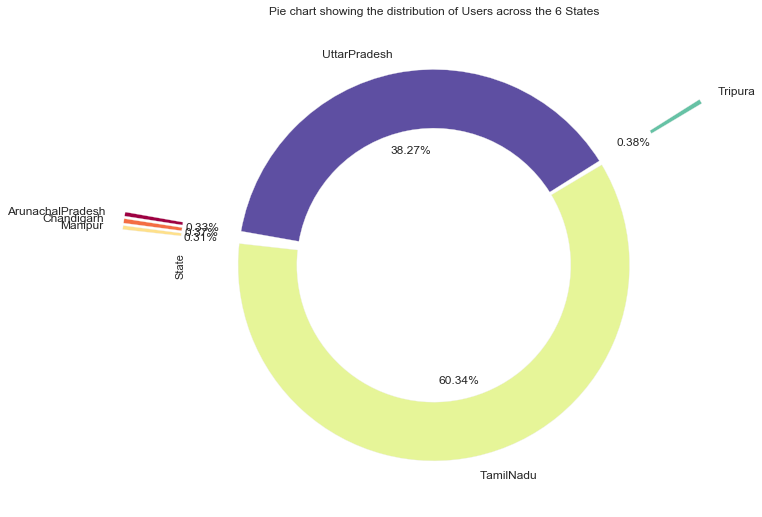

In [54]:
explode = (0.6, 0.6,0.6, 0.0, 0.6, 0.0)
df_uniqueUsers.groupby('state')['device_id'].nunique().plot(kind='pie', figsize=(10,9), fontsize=12,
autopct='%3.2f%%', wedgeprops=dict(width=0.3), startangle=170, cmap='Spectral', explode=explode)
plt.ylabel('State')
plt.title('Pie chart showing the distribution of Users across the 6 States')

In [55]:
df_uniqueUsers.groupby('phone_brand')['device_id'].nunique().sort_values(ascending=False)

phone_brand
Xiaomi     2409
Samsung    2139
Huawei     1506
vivo       883 
OPPO       690 
          ...  
唯比         1   
台电         1   
百加         1   
易派         1   
摩乐         1   
Name: device_id, Length: 81, dtype: int64

In [56]:
df_uniqueUsers.groupby('phone_brand')['device_id'].nunique().sort_values(ascending=False).head(10)

phone_brand
Xiaomi     2409
Samsung    2139
Huawei     1506
vivo       883 
OPPO       690 
Meizu      590 
Coolpad    474 
HTC        148 
Lenovo     112 
LeEco      84  
Name: device_id, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the distribution of Users across Phone brands')

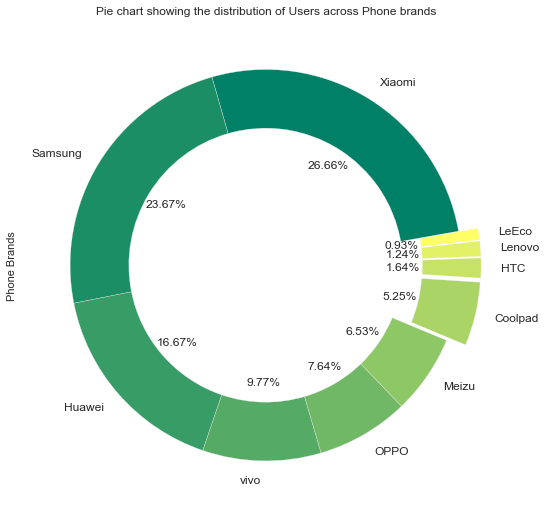

In [57]:
explode = (0,0,0,0,0,0,0.1, 0.1,0.1, 0.1)
df_uniqueUsers.groupby('phone_brand')['device_id'].nunique().sort_values(ascending=False).head(10).plot(kind='pie', figsize=(10,9), fontsize=12,
autopct='%3.2f%%', wedgeprops=dict(width=0.3),   startangle=10, cmap='summer',   explode=explode)
plt.ylabel('Phone Brands')
plt.title('Pie chart showing the distribution of Users across Phone brands')

In [58]:
df_uniqueUsers.groupby('gender')['device_id'].nunique()

gender
F    3573
M    5990
Name: device_id, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the distribution of Users across gender')

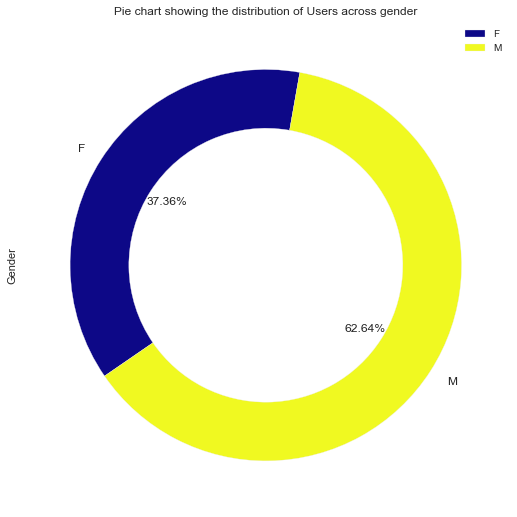

In [59]:
df_uniqueUsers.groupby('gender')['device_id'].nunique().plot(kind='pie', figsize=(10,9), fontsize=12,
autopct='%3.2f%%', wedgeprops=dict(width=0.3),   startangle=80, cmap='plasma',  legend=True)
plt.ylabel('Gender')
plt.title('Pie chart showing the distribution of Users across gender')

In [60]:
df_uniqueUsers.groupby('group')['device_id'].nunique()

group
F23-      705 
F24-26    573 
F27-28    400 
F29-32    648 
F33-42    701 
F43+      546 
M22-      1012
M23-26    1253
M27-28    666 
M29-31    873 
M32-38    1154
M39+      1032
Name: device_id, dtype: int64

Text(0.5, 1.0, 'Pie chart showing the distribution of Users across the 12 Age segments')

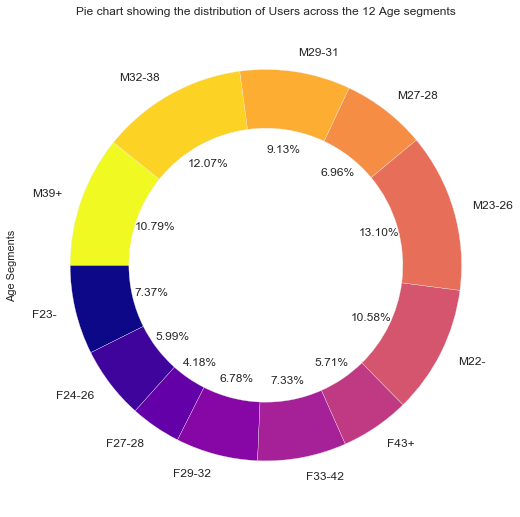

In [61]:
#explode = (0.1,0.1,0,0.1,0,0.1,0, 0.1,0, 0.1,0,0.1)
df_uniqueUsers.groupby('group')['device_id'].nunique().plot(kind='pie', figsize=(10,9), fontsize=12,
autopct='%3.2f%%', wedgeprops=dict(width=0.3),   startangle=180, cmap='plasma')
plt.ylabel('Age Segments')
plt.title('Pie chart showing the distribution of Users across the 12 Age segments')

In [62]:
df_uniqueUsers.groupby('phone_brand')['device_id'].nunique().sort_values(ascending=False).head(10)

phone_brand
Xiaomi     2409
Samsung    2139
Huawei     1506
vivo       883 
OPPO       690 
Meizu      590 
Coolpad    474 
HTC        148 
Lenovo     112 
LeEco      84  
Name: device_id, dtype: int64

In [63]:
df_uniqueUsers_topBrands = df_uniqueUsers.loc[df_uniqueUsers['phone_brand'].isin(['Xiaomi','Samsung','Huawei','vivo','OPPO','Meizu','Coolpad','HTC','Lenovo','LeEco'])]

In [64]:
df_uniqueUsers_topBrands

,event_id,device_id,timestamp,longitude,latitude,city,state,latlong,gender,age,group,phone_brand,device_model
97304,3186309,7662139143719919126,2016-05-05 21:00:34,80.309272,13.149176,Chennai,TamilNadu,nannan,M,20,M22-,Coolpad,大神F1
16866,926804,7983871429718484702,2016-05-03 12:29:47,80.335435,13.189053,Chennai,TamilNadu,nannan,M,32,M32-38,Coolpad,大神F2全高清版
126652,918193,5731369272434022440,2016-05-04 04:35:06,80.343613,13.153332,Chennai,TamilNadu,nannan,M,26,M23-26,HTC,One max
757,460124,5536513450525271144,2016-05-01 21:30:10,80.359796,13.128174,Chennai,TamilNadu,80.35979613.128174,M,32,M32-38,Xiaomi,红米2
758,2921356,-4792366453774469421,2016-05-04 20:56:56,80.309010,13.114228,Chennai,TamilNadu,80.3090113.114228,M,43,M39+,Xiaomi,红米
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248871,2854562,-8997838108653864769,2016-05-07 12:26:43,80.367161,13.178641,Chennai,TamilNadu,80.36716113.178641,F,29,F29-32,Samsung,Galaxy S4
3249354,1656210,5807163161835078933,2016-05-04 02:51:48,80.329626,13.184135,Chennai,TamilNadu,80.3296259999999813.184135000000001,F,20,F23-,Xiaomi,MI 4
3249606,1155734,825033023456413543,2016-05-02 18:55:11,77.979264,11.425789,Tiruchengode,TamilNadu,77.97926411.425789,M,26,M23-26,Samsung,Galaxy S4
3250909,2376126,-2473948708647244299,2016-05-01 20:43:00,80.297840,13.107062,Chennai,TamilNadu,80.2978400000000213.107062,M,30,M29-31,Samsung,A360t


In [65]:
df_uniqueUsers_topBrands.groupby('phone_brand')['device_id'].nunique().sort_values(ascending=False).head(10)

phone_brand
Xiaomi     2409
Samsung    2139
Huawei     1506
vivo       883 
OPPO       690 
Meizu      590 
Coolpad    474 
HTC        148 
Lenovo     112 
LeEco      84  
Name: device_id, dtype: int64

In [66]:
df_uniqueUsers_topBrands.groupby('group')['device_id'].nunique()

group
F23-      667 
F24-26    538 
F27-28    381 
F29-32    613 
F33-42    666 
F43+      517 
M22-      954 
M23-26    1175
M27-28    635 
M29-31    818 
M32-38    1097
M39+      974 
Name: device_id, dtype: int64

In [67]:
#phonebrand_dist = ['gender', 'age' , 'group']

In [69]:
#for value in phonebrand_dist:
 #   plt.figure(figsize=(15,5))
  #  df_uniqueUsers_topBrands[df_uniqueUsers_topBrands['gender'] == 'M'].groupby(['phone_brand'])[value].count().plot(kind='bar', color='green' )
   # df_uniqueUsers_topBrands[df_uniqueUsers_topBrands['gender'] == 'F'].groupby(['phone_brand'])[value].count().plot(kind='bar', color='purple')
   # df_uniqueUsers_topBrands[df_uniqueUsers_topBrands['phone_brand'] == 'Huawei'].groupby(['gender'])[value].count().plot(kind='bar', color='blue')
    #df_uniqueUsers_topBrands[df_uniqueUsers_topBrands['phone_brand'] == 'vivo'].groupby(['gender'])[value].count().plot(kind='bar', color='red')
    #df_uniqueUsers_topBrands[df_uniqueUsers_topBrands['phone_brand'] == 'OPPO'].groupby(['gender'])[value].count().plot(kind='bar', color='blue')
    #df_uniqueUsers_topBrands[df_uniqueUsers_topBrands['phone_brand'] == 'Meizu'].groupby(['gender'])[value].count().plot(kind='bar', color='red')
    #df_uniqueUsers_topBrands[df_uniqueUsers_topBrands['phone_brand'] == 'Coolpad'].groupby(['gender'])[value].count().plot(kind='bar', color='blue')
    #df_uniqueUsers_topBrands[df_uniqueUsers_topBrands['phone_brand'] == 'HTC'].groupby(['gender'])[value].count().plot(kind='bar', color='red')
    #df_uniqueUsers_topBrands[df_uniqueUsers_topBrands['phone_brand'] == 'Lenovo'].groupby(['gender'])[value].count().plot(kind='bar', color='blue')
    #df_uniqueUsers_topBrands[df_uniqueUsers_topBrands['phone_brand'] == 'LeEco'].groupby(['gender'])[value].count().plot(kind='bar', color='red')
    #plt.ylabel(value)
 #  plt.legend(['Xiaomi','Samsung','Huawei','vivo','OPPO','Meizu','Coolpad','HTC','Lenovo','LeEco'])
#plt.legend(['Female','Male'])